In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

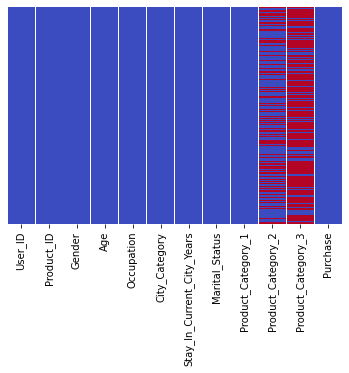

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

In [9]:
newdf = df.copy()

# Exploratory Data Analysis

## Age Distribution

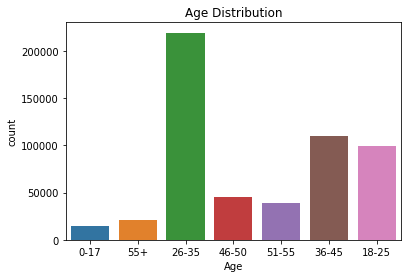

In [10]:
sns.countplot(newdf['Age']);
plt.title('Age Distribution');

Most Populated Age Group is 26-35 years

## Gender Distribution

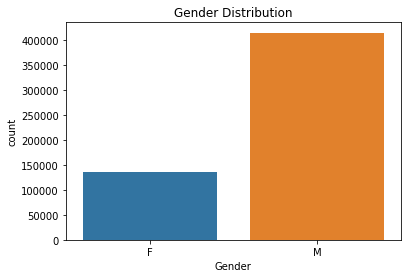

In [11]:
sns.countplot(newdf['Gender']);
plt.title('Gender Distribution');

More Males than Females

## Occupation Distribution

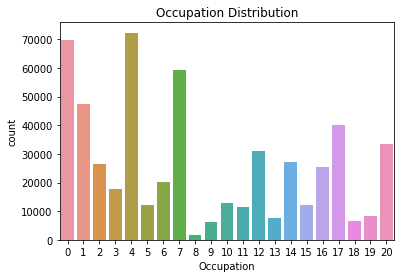

In [12]:
sns.countplot(newdf['Occupation']);
plt.title('Occupation Distribution');

Occupation number 0 and 4 employ the most customers.
Occupation number 8 and 9 employ the least customers.

## City Category Distribution

In [13]:
city = newdf['City_Category'].value_counts()

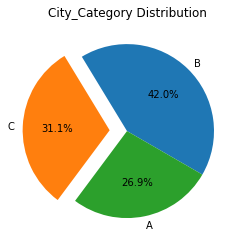

In [14]:
plt.pie(city.values, labels=city.index, startangle=-30,
       explode=(0,0.20,0), autopct='%1.1f%%');
plt.title('City_Category Distribution');

Most Customers are from City B

## Marital Status Distribution

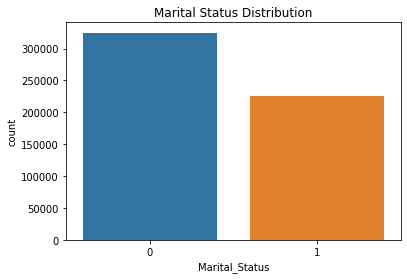

In [15]:
sns.countplot(newdf['Marital_Status']);
plt.title('Marital Status Distribution');

Majority of Customers are Unmarried

## Stay in City Distribution

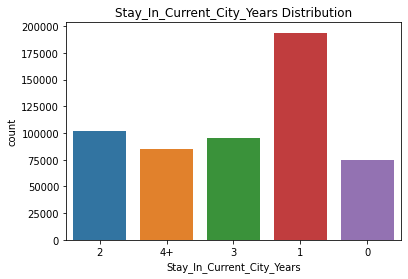

In [16]:
sns.countplot(newdf['Stay_In_Current_City_Years']);
plt.title('Stay_In_Current_City_Years Distribution');

Most customers are living in the city for 1 years

## Purchase Distribution

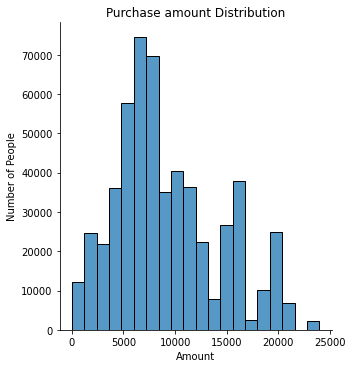

In [17]:
sns.displot(newdf['Purchase'], bins=20);
plt.title('Purchase amount Distribution');
plt.xlabel('Amount');
plt.ylabel('Number of People');

There is a direct correlation with number of customers and amount spent

# Bivariate Analysis

##  Age - Gender Analysis

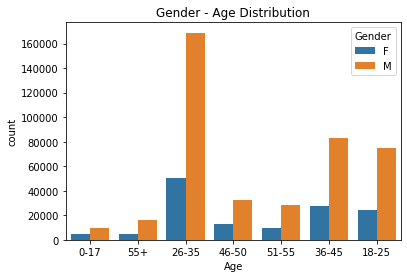

In [18]:
sns.countplot(newdf['Age'], hue=newdf['Gender']);
plt.title('Gender - Age Distribution');

## Age - Purchase Analysis

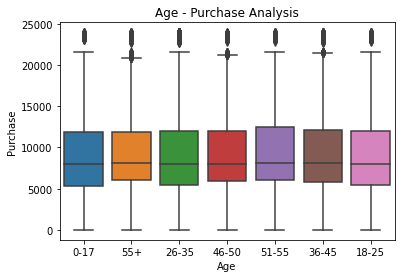

In [19]:
sns.boxplot(newdf['Age'], newdf['Purchase']);
plt.title('Age - Purchase Analysis');

In [20]:
age = ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
purchase = []
for item_age in age:
    purchase.append(newdf[newdf['Age'] == item_age]['Purchase'].sum())

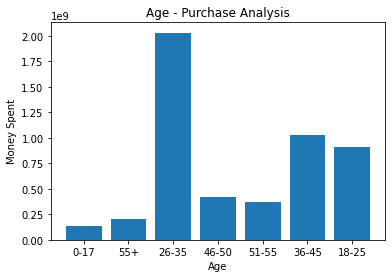

In [21]:
plt.bar(age, purchase, align='center');
plt.xlabel('Age');
plt.ylabel('Money Spent');
plt.title('Age - Purchase Analysis');

In [22]:
newdf['Purchase'].mean()

9263.968712959126

In [23]:
newdf['Combined_G_M'] = newdf.apply(lambda x: '%s-%s' % (x['Gender'], x['Marital_Status']), axis=1)

<AxesSubplot:>

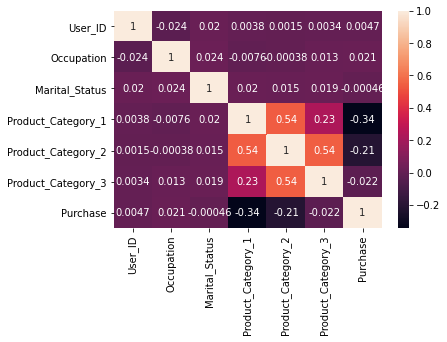

In [24]:
sns.heatmap(newdf.corr(), annot=True)